# Boundary Value Problems (The One-Group Diffusion Equation) - Chapter 18, McClarren

We now turn our attention to the solution of the one-dimensional (1-D), one-speed (one energy group) neutron diffusion equation. This is an example of a *boundary-value problem*. A boundary value problem is a differential equation or a system of differential equations that specifies the value of the solution or its
derivatives at more than one point.

In the previous chapter we dealt with initial value problems where the conditions for the
solution were prescribed at a single point that we called $t = 0$. In boundary value problems
we specify the solution at multiple points as we shall see. This means we cannot start at
one point and move the solution in a particular direction. [This is sometimes called *marching*...] Rather, we must solve a system of equations to find the solution that satisfies the boundary values.
The general neutron diffusion equation for the scalar flux of neutrons, $\phi(r,t)$ is given by

$$ \frac{1}{v} \frac{\partial \phi}{\partial t} -\nabla \cdot D(r) \nabla \phi(r,t) + \Sigma_a(r) \phi(r,t) = \nu \Sigma_f(r) \phi(r,t) + Q(r,t),$$

where Our notation is standard: $v$ is the neutron speed, $D(r)$ is the diffusion coefficient, $\Sigma_a$ is the macroscopic absorption cross-section, $\Sigma_f $ is the macroscopic fission cross section, $\nu$ is the
number of neutrons per fission, and $Q(r,t)$ is a prescribed source. The boundary conditions
we will consider for this equation are generic conditions,

$$ A(r,t) \phi(r,t) + B(r,t) \frac{\partial \phi}{\partial r} = C(r,t).  $$

The initial condition is 

$$ \phi(r,0) = \phi_0(r).$$

We can eliminate the time variable from this equation by integrating over a time step from
$t^n = n \Delta t$ to $t^{n+1} = (n+1)\Delta t$:

$$ \frac{1}{v} \left( \phi^{n+1}(r) - \phi^{n}(r) \right) - \int\limits_{t^n}^{t^{n+1}} dt \; [\nabla \cdot D(r) \nabla \phi(r,t) + \Sigma_a(r) \phi(r,t) ]$$

$$ = \int\limits_{t^n}^{t^{n+1}} dt \; [\nu \Sigma_f(r) \phi(r,t) + Q(r,t)],$$

where $\phi^n(r) = \phi(r,n
t)$.

Using the backward Euler approach to the integrals (that is the right-hand rectangle rule)
we get

$$ \frac{1}{v \Delta t} \left( \phi^{n+1}(r) - \phi^{n}(r) \right) - \nabla \cdot D(r) \nabla \phi^{n+1}(r) + \Sigma_a(r) \phi^{n+1}(r)$$ 

$$= \nu \Sigma_f(r) \phi^{n+1}(r) + Q^{n+1}(r),$$

The next step is to define a new absorption cross-section and source as

$$\Sigma_a^{*} (r)= \Sigma_a(r) + \frac{1}{v \Delta t} \qquad Q^{n+1,*} (r)= Q(r) + \frac{1}{v \Delta t} \phi^{n}(r)$$

With these definitions we get the following equation

$$ - \nabla \cdot D(r) \nabla \phi^{n+1}(r) + \Sigma_a^{*}(r) \phi^{n+1}(r) = \nu \Sigma_f(r) \phi^{n+1}(r) + Q^{n+1,*}(r),$$

This is a steady-state diffusion equation for the scalar flux at time n + 1. Therefore, we can
focus our efforts on solving steady-state problems, knowing that to solve time-dependent
equations, we just have to redefine the source and absorption cross-sections appropriately.

## Discretizing the Steady-State Diffusion Equation

We begin with the steady-state diffusion equation with a reflecting boundary condition at
$r = 0$ and a general boundary condition at $r = R$:

$$ - \nabla \cdot D(r) \nabla \phi(r) + \Sigma_a(r) \phi(r) = \nu \Sigma_f(r) \phi(r) + Q(r),$$

$$\frac{d \phi}{dr}\big|_{r=0} = 0$$

$$ A(R) \phi(R) + B(R)\frac{d \phi}{dr}(R) = C(R) $$

We seek to solve this numerically on a grid of spatial cells

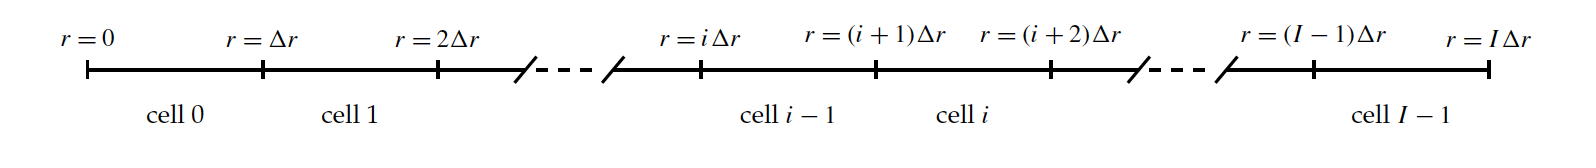

In our notation there will be $I$ cells and $I + 1$ edges. The cell centers are given by

$$ r_i = i \Delta r + \frac{\Delta r}{2}, \qquad i=0, 1, \cdots, I-1, $$

and the left and right edges are given by the formulas

$$ r_{i−1/2} = i \Delta r, \qquad r_{i+1/2} = (i + 1) \Delta r, \qquad i = 0, 1, \cdots, I − 1.$$

We can construct a Python function that creates the cell edges and cell centers given R
and I .

In [6]:
def create_grid(R,I):
    """Create the cell edges and centers for a 
    domain of size R and I cells
    Args:
        R: size of domain
        I: number of cells
        
    Returns:
        Delta_r: the width of each cell
        centers: the cell centers of the grid
        edges: the cell edges of the grid
    """
    Delta_r = float(R)/I
    centers = np.arange(I)*Delta_r + 0.5*Delta_r
    edges = np.arange(I+1)*Delta_r
    return Delta_r, centers, edges

Our problem will be set up such that inside each cell the material properties are constant
so that inside cell $i$,

$$D(r) = D_i, \; \Sigma_a(r) = \Sigma_{a,i}, \;  \Sigma_f(r) = \Sigma_{f,i}, \;  Q(r) = Q_i, \;   r \in (r_{i−1/2}, r_{i+1/2}).$$

### The Diffusion Operator in Different Geometries 

The definition of $\nabla \cdot D(r) \nabla$ in several geometries is given below:

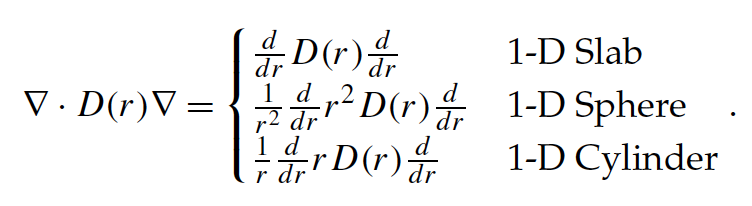

Also, the differential volume element in each geometry is

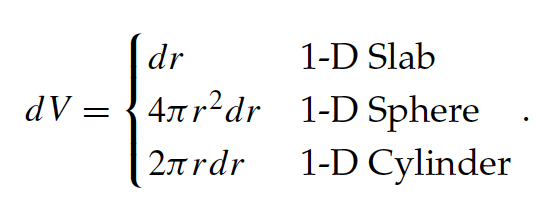

We define $\phi_i$ as the average value of the scalar flux in cell $i$. This quantity is given by

$$\phi_i = \frac{1}{V_i}\int\limits_{r_{i-1/2}}^{r_{i+1/2}} dV \; \phi(r)  $$

To develop the discrete equations we will integrate the diffusion equation term by term.
We first integrate the absorption term in the diffusion equation over cell $i$ and divide by $V_i$,

$$ \frac{1}{V_i} \int\limits_{r_{i-1/2}}^{r_{i+1/2}} dV \; \Sigma_a(r) \phi(r) = \frac{\Sigma_{a,i}}{V_i} \int\limits_{r_{i-1/2}}^{r_{i+1/2}} dV \; \phi(r) = \Sigma_{a,i} \phi_i $$

The fission term is handled in a similar manner

$$ \frac{1}{V_i} \int\limits_{r_{i-1/2}}^{r_{i+1/2}} dV \; \nu \Sigma_f(r) \phi(r) = \nu \Sigma_{f,i} \phi_i $$

The source term is similarly straightforward because $Q(r)$ is constant in cell $i$,

$$ \frac{1}{V_i}\int\limits_{r_{i-1/2}}^{r_{i+1/2}} dV \; Q(r) = Q_i.  $$

The diffusion term is a bit trickier,

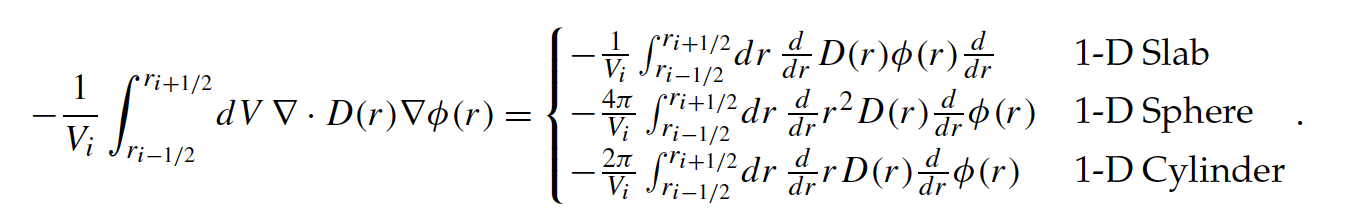

To simplify these we can use the fundamental theorem of calculus to get

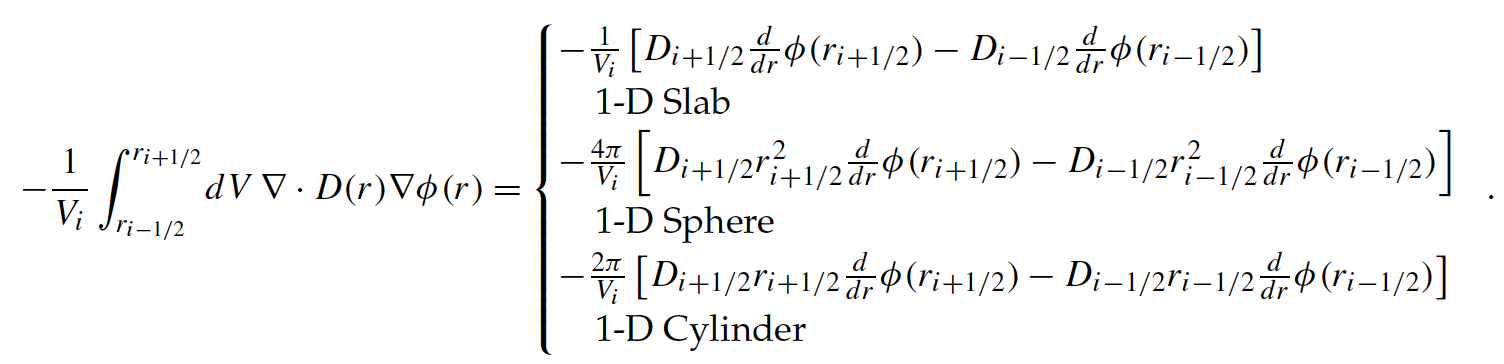

Defining the surface area, $S_{i\pm1/2}$ at the cell edge for each geometry will allow us to simplify
this a bit further:

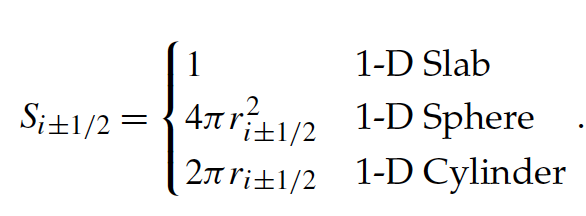

Using this definition, we get

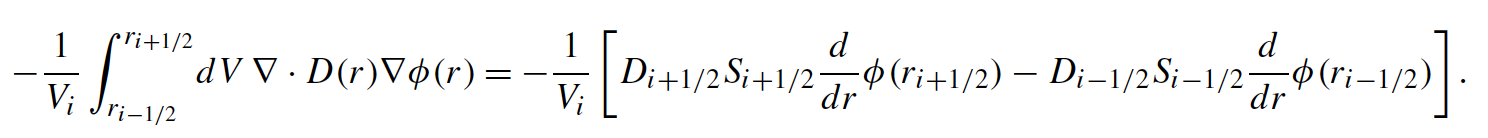

The final piece of the derivation is to write the value of the derivative at the cell edge using
the central difference formula. To do this we will have to interpret the cell average scalar flux
as the value of the scalar flux at the cell center:

$$\phi_i \approx \phi(r_i) $$

With this definition we can write

$$\frac{d}{dr} \phi(r_{i+1/2}) = \frac{\phi_{i+1}-\phi_i}{\Delta r} + O(\Delta r^2) $$

Therefore, the fully discrete diffusion term is

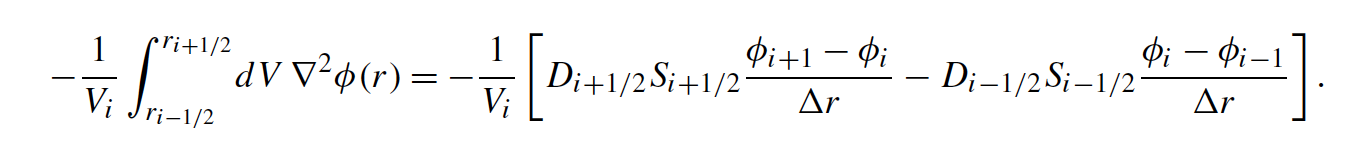

Putting all of this together gives us the diffusion equation integrated over a cell volume:

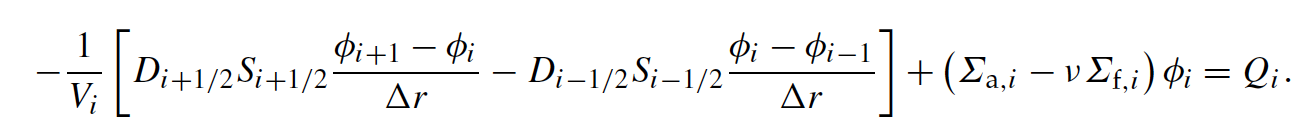

### Interface Diffusion Coefficient

We need to define what we mean by $D_{i+1/2}$ and $D_{i−1/2}$ because the diffusion coefficient
is only constant inside a cell. For these terms will define a diffusion coefficient so that the
neutron current is continuous at a cell face. In particular we define $\phi_{i+1/2}$ so that

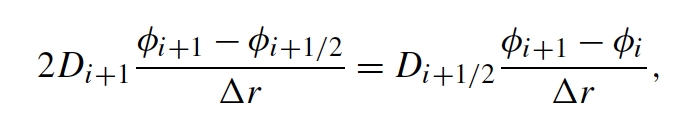

and

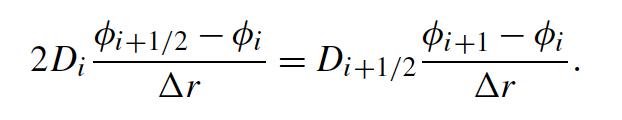

These two equations state that we want to define $D_{i+1/2}$ and $\phi_{i+1/2}$ so that the current is the
same if we calculate it from the left or the right. We also get a similar system defining $D_{i−1/2}$.
Solving these equations for $D_{i+1/2}$ and $D_{i−1/2}$ we get

$$ D_{i\pm1/2} = \frac{2 D_i D_{i\pm1}}{D_i + D_{i\pm1}} $$

This definition for the diffusion coefficient at the interface takes the harmonic mean of the
diffusion coefficient on each side and assures that the neutron current density is continuous
at the interface.

### Boundary Conditions

We need to enforce our general boundary condition at $r = R$, that is

$$ A(R) \phi(R) + B(R)\frac{d \phi}{dr}(R) = C(R) $$

To see how this is going to come into the equation, we examine at the equation for $i = I − 1$,

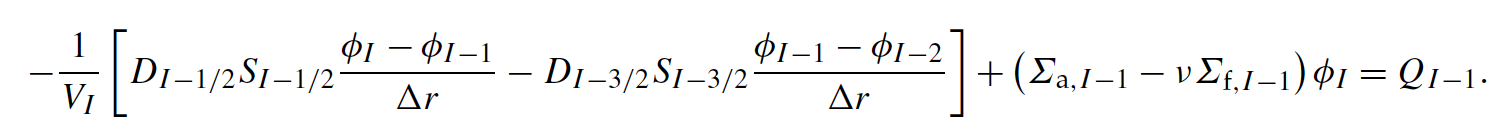

Notice that this equation has $phi_I$ , which is the undefined value of the scalar flux outside
the domain. We need to create a value for this parameter that is consistent with the boundary
condition. To do this we will make the following approximations:

$$ \phi(R) \approx \frac{1}{2} (\phi_{I-1} + \phi_I) $$

and

$$ \frac{d \phi}{dr}(R) \approx \frac{\phi_{I} - \phi_{I-1}}{\Delta r} $$

Using these in our boundary condition, we get the final equation that we need

$$ \left( \frac{A}{2}-\frac{B}{\Delta r}\right) \phi_{I-1} + \left( \frac{A}{2}+\frac{B}{\Delta r}\right)\phi_I = C $$

Here we have dropped the spatial dependence of $A, B,$ and $C$ in the boundary condition.

### Types of Boundary Conditions on the Outer Surface

- Dirichlet boundary condition (fixed value of flux on the surface)

$$\phi(R) = c $$

This implies that $A=1$, $B=0$ $C=c$

- Reflecting boundary condition (derivative of the flux is zero)

$$\frac{d \phi}{dr}(R) = 0$$

This would mean that $A=0$, $B=1$ and $C=0$

- Vacuum boundary (zero incident neutron flow)

Here, $A = \frac{1}{4}$, $B=\frac{D}{2}$, $C=0$

### Reflecting Boundary Condition at r = 0

At the $r = 0$ boundary we require a reflecting boundary in the curvilinear geometries
(spherical and cylindrical), and we want to specify the same for the slab. A reflecting boundary
has

$$\frac{d \phi}{dr}(0) = 0$$

It turns out that this is automatically enforced in the curvilinear geometries because $S_{−1/2} = 0$,
and the derivative at the inner edge of cell 0 is effectively zero. To enforce this in slab geometry
we just need to force $S_{−1/2}$ = 0 to make the equation for $i = 0$:

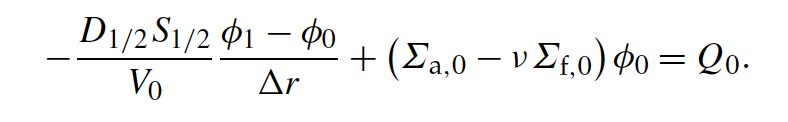

## Python Code for the Diffusion Equation

We have now completely specified the discrete equations for our diffusion problem. This
section will detail how to build the matrices and vectors.

There are $I+1$ equations in our system:

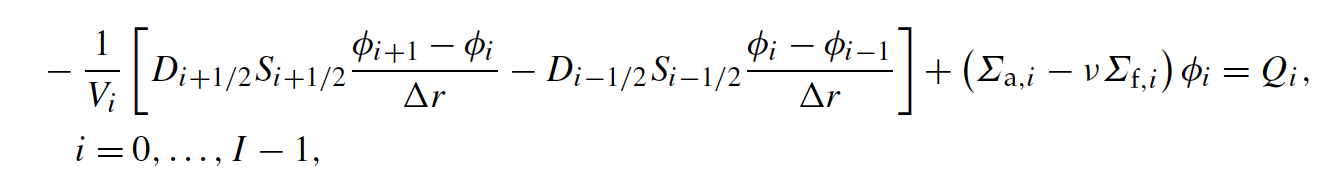

and

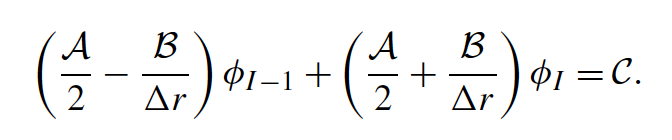

This is a system of equations to solve, to do this we first define our solution vector and
righthand side

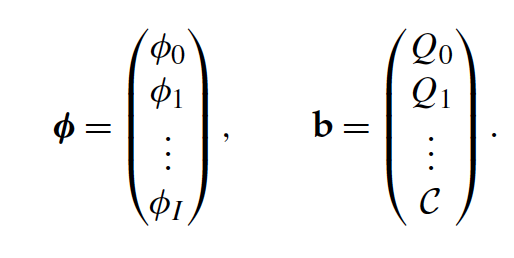

Our system will be written as

$$\textbf{A \phi} = \textbf{b}. $$  
 
To define $\textbf{A}$, we will factor our equations to be

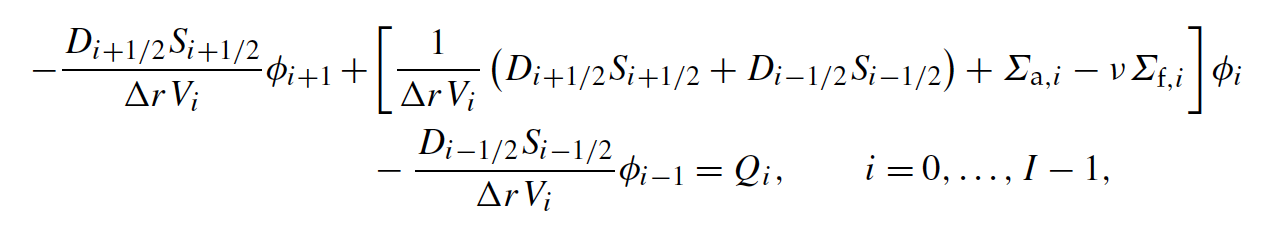

and

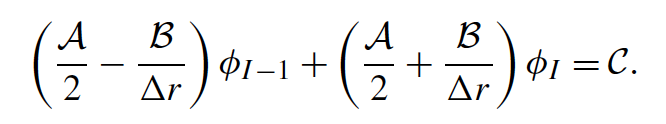

From these equations we get that the element of $\textbf{A}$ in row $i$ and column $j$ is

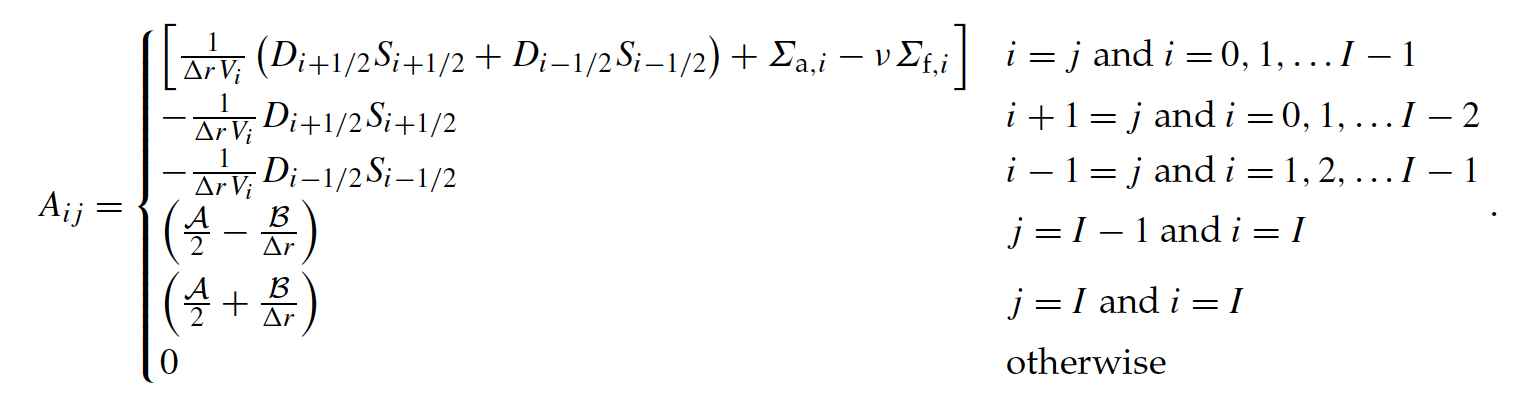

We will now set up a function that

* builds the matrix $\textbf{A}$,
* builds the vector $\textbf{b}$,
* uses Gauss elimination to solve the system for the scalar fluxes $\phi$.

The code will call the grid function that we defined before. Additionally, our function will
take as arguments the name of a function that defines each of the material properties.

In [8]:
def DiffusionSolver(R,I,D,Sig_a,nuSig_f, Q,BC, geometry):
    """Solve the neutron diffusion equation in a 1-D geometry
    using cell-averaged unknowns
    Args:
        R: size of domain
        I: number of cells
        D: name of function that returns diffusion coefficient for a given r
        Sig_a: name of function that returns Sigma_a for a given r
        nuSig_f: name of function that returns nu Sigma_f for a given r
        Q: name of function that returns Q for a given r
        BC: Boundary Value of phi at r=R
        geometry: shape of problem 0 for slab
                1 for cylindrical
                2 for spherical
        
    Returns:
        centers: the cell centers of the grid
        phi:  cell-average value of the scalar flux
        
    """
    #create the grid
    Delta_r, centers, edges = create_grid(R,I)
    A = np.zeros((I+1,I+1))
    b = np.zeros(I+1)
    #define surface areas and volumes
    assert( (geometry==0) or (geometry == 1) or (geometry == 2))
    if (geometry == 0):
        #in slab it's 1 everywhere except at the left edge
        S = 0.0*edges+1
        S[0] = 0.0 #this will enforce reflecting BC
        #in slab its dr
        V = 0.0*centers + Delta_r
    elif (geometry == 1):
        #in cylinder it is 2 pi r
        S = 2.0*np.pi*edges
        #in cylinder its pi (r^2 - r^2)
        V = np.pi*( edges[1:(I+1)]**2 
                   - edges[0:I]**2 )
    elif (geometry == 2):
        #in sphere it is 4 pi r^2
        S = 4.0*np.pi*edges**2
        #in sphere its 4/3 pi (r^3 - r^3)
        V = 4.0/3.0*np.pi*( edges[1:(I+1)]**3
                   - edges[0:I]**3 )
        
    #Set up BC at R
    A[I,I] = (BC[0]*0.5 + BC[1]/Delta_r)
    A[I,I-1] = (BC[0]*0.5 - BC[1]/Delta_r)
    b[I] = BC[2]
    r = centers[0]
    DPlus = 0
    #fill in rest of matrix
    for i in range(I):
        r = centers[i]
        DMinus = DPlus
        DPlus = 2*(D(r)*D(r+Delta_r))/(D(r)+D(r+Delta_r))
        A[i,i] = (1.0/(Delta_r * V[i])*DPlus*S[i+1] +
                  Sig_a(r) - nuSig_f(r))
        if (i>0):
            A[i,i-1] = -1.0*DMinus/(Delta_r * V[i])*S[i]
            A[i,i] += 1.0/(Delta_r * V[i])*(DMinus*S[i])
        A[i,i+1] = -DPlus/(Delta_r * V[i])*S[i+1]
        b[i] = Q(r)
    
    #solve system
    phi = GaussElimPivotSolve(A,b)
    #remove last element of phi because it is outside the domain
    phi = phi[0:I]
    return centers, phi

def BackSub(aug_matrix,x):
    """back substitute a N by N system after Gauss elimination

    Args:
        aug_matrix: augmented matrix with zeros below the diagonal
        x: length N vector to hold solution
    Returns:
        nothing
    Side Effect:
        x now contains solution
    """
    N = x.size
    for row in range(N-1,-1,-1):
        RHS = aug_matrix[row,N]
        for column in range(row+1,N):
            RHS -= x[column]*aug_matrix[row,column]
        x[row] = RHS/aug_matrix[row,row]
    return
def swap_rows(A, a, b):
    """Rows two rows in a matrix, switch row a with row b
    
    args: 
    A: matrix to perform row swaps on
    a: row index of matrix
    b: row index of matrix
    
    returns: nothing
    
    side effects:
    changes A to rows a and b swapped
    """
    assert (a>=0) and (b>=0)
    N = A.shape[0] #number of rows
    assert (a<N) and (b<N) #less than because 0-based indexing
    temp = A[a,:].copy()
    A[a,:] = A[b,:].copy()
    A[b,:] = temp.copy()
def GaussElimPivotSolve(A,b,LOUD=0):
    """create a Gaussian elimination with pivoting matrix for a system

    Args:
        A: N by N array
        b: array of length N
    Returns:
        solution vector in the original order
    """
    [Nrow, Ncol] = A.shape
    assert Nrow == Ncol
    N = Nrow
    #create augmented matrix
    aug_matrix = np.zeros((N,N+1))
    aug_matrix[0:N,0:N] = A
    aug_matrix[:,N] = b
    #augmented matrix is created
    
    #create scale factors 
    s = np.zeros(N)
    count = 0
    for row in aug_matrix[:,0:N]: #don't include b
        s[count] = np.max(np.fabs(row))
        count += 1
    if LOUD:
        print("s =",s)
    if LOUD:
        print("Original Augmented Matrix is\n",aug_matrix)
    #perform elimination
    for column in range(0,N):
        
        #swap rows if needed
        largest_pos = np.argmax(np.fabs(aug_matrix[column:N,column]/s[column])) + column
        if (largest_pos != column):
            if (LOUD):
                print("Swapping row",column,"with row",largest_pos)
                print("Pre swap\n",aug_matrix)
            swap_rows(aug_matrix,column,largest_pos)
            #re-order s
            tmp = s[column]
            s[column] = s[largest_pos]
            s[largest_pos] = tmp
            if (LOUD):
                print("A =\n",aug_matrix)
        #finish off the row
        for row in range(column+1,N):
            mod_row = aug_matrix[row,:]
            mod_row = mod_row - mod_row[column]/aug_matrix[column,column]*aug_matrix[column,:]
            aug_matrix[row] = mod_row
    #now back solve
    x = b.copy()
    if LOUD:
        print("Final aug_matrix is\n",aug_matrix)
    BackSub(aug_matrix,x)
    return x

### Test Problems for Each Geometry

Before we proceed, recall that the steady state diffusion equation will only have a solution
for subcritical problems with a source. If the system is critical or supercritical, there is no finite
steady state solution. We will discuss in future lectures how to solve these problems.

In an infinite, homogeneous medium all the spatial derivatives go to zero and the diffusion
equation reads

$$ \phi(r) = \frac{Q}{\Sigma_a - \nu \Sigma_f}$$

Therefore, we expect that if we make our problem have a reflecting boundary condition it
should reproduce this infinite medium solution.

To try this out we define functions for each of $D$, $\Sigma_a$, $\nu \Sigma_f$, and $Q$:

In [9]:
import numpy as np
#in this case all three are constant
def D(r):
    return 0.04;
def Sigma_a(r):
    return 1;
def nuSigma_f(r):
    return 0;
def Q(r):
    return 1
print('For this problem the diffusion length is', np.sqrt(D(1)/Sigma_a(1)))
inf_med = Q(1)/(Sigma_a(1) - nuSigma_f(1))
print('The infinite medium solution is',inf_med)

For this problem the diffusion length is 0.2
The infinite medium solution is 1.0


To compute the solution we call our DiffusionSolver function. In this case we set $R =
10$ and $I = 10$; this makes $\Delta r = 1$. We set the boundary condition parameter to be [0,1,0] to make it correspond to the reflecting boundary condition discussed above.

In [10]:
R = 10
I = 10
#Solve Diffusion Problem in Slab geometry
x, phi_slab = DiffusionSolver(R, I,D, Sigma_a, nuSigma_f, Q,[0,1,0],0)
#Solve Diffusion Problem in cylindrical geometry
rc, phi_cyl = DiffusionSolver(R, I,D, Sigma_a, nuSigma_f, Q,[0,1,0],1)
#Solve Diffusion Problem in spherical geometry
rs, phi_sphere = DiffusionSolver(R, I,D, Sigma_a, nuSigma_f, Q,[0,1,0],2)

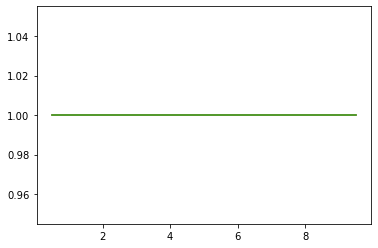

In [12]:
import matplotlib.pyplot as plt
plt.plot(x,phi_slab)
plt.plot(rc,phi_cyl)
plt.plot(rs,phi_sphere)

These results demonstrate that our method for solving the diffusion equation can solve the
simplest possible problem. This is an important test, however, because if our method cannot
solve this problem correctly, it is not likely to be able to solve more difficult problems.

Next, we test our implementation on a heterogeneous problem where the material properties
are discontinuous at $r = 5$ with fuel from 0 to 5 and moderator from 5 to 10. If we are
solving for the thermal flux, there will be a source in the moderator.

In [15]:
def D(r):
    value = 5.0*(r<=5) + 1.0*(r>5)
    return value;
def Sigma_a(r):
    value = 1.0*(r<=5) + 0.1*(r>5)
    return value;
def nuSigma_f(r):
    value = 0.4*(r<=5) + 0.0*(r>5)
    return value;
def Q(r):
    value = 0*(r<=5) + 1.0*(r>5)
    return value

Now, we use the DiffusionSolver function to solve this problem with a zero-Dirichlet
boundary conditions at $r = R$ and a reflecting boundary at $r = 0$:

In [16]:
R = 10
I = 30
#Solve Diffusion Problem in Slab geometry
x, phi_slab = DiffusionSolver(R, I,D, Sigma_a, nuSigma_f, Q,[1,0,0],0)
#Solve Diffusion Problem in cylindrical geometry
rc, phi_cyl = DiffusionSolver(R, I,D, Sigma_a, nuSigma_f, Q,[1,0,0],1)
#Solve Diffusion Problem in cylindrical geometry
rs, phi_sphere = DiffusionSolver(R, I,D, Sigma_a, nuSigma_f, Q,[1,0,0],2)

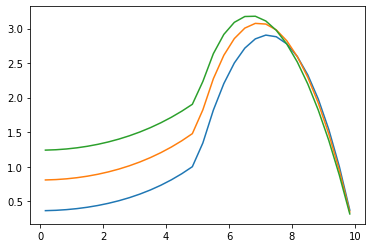

In [17]:
import matplotlib.pyplot as plt
plt.plot(x,phi_slab)
plt.plot(rc,phi_cyl)
plt.plot(rs,phi_sphere)

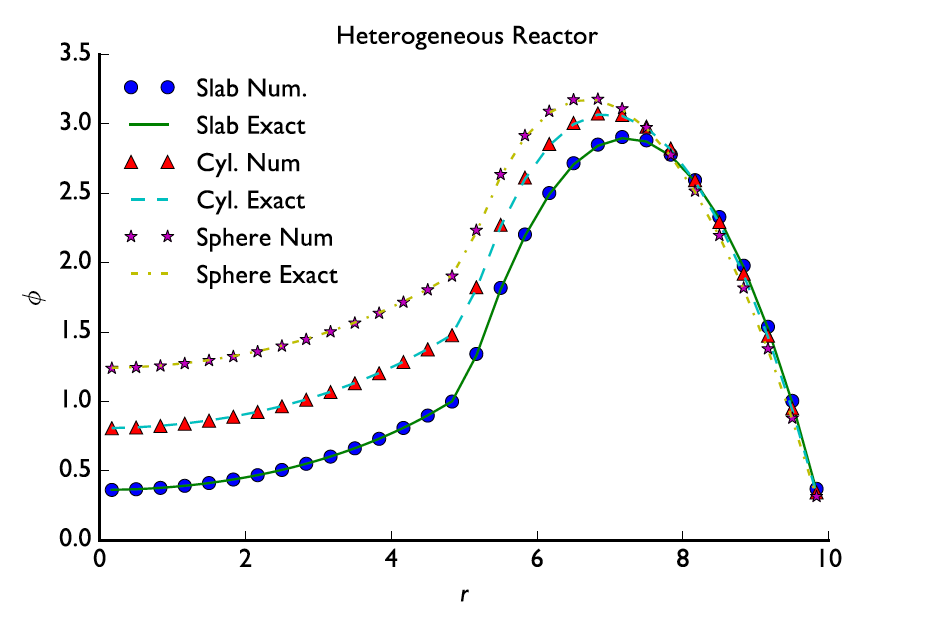

In this figure the exact solutions are also shown. These can be found by solving the diffusion
equation in each region and joining the solutions by making the scalar flux and neutron
current continuous at $r = 5$.  For example, the slab solution is:

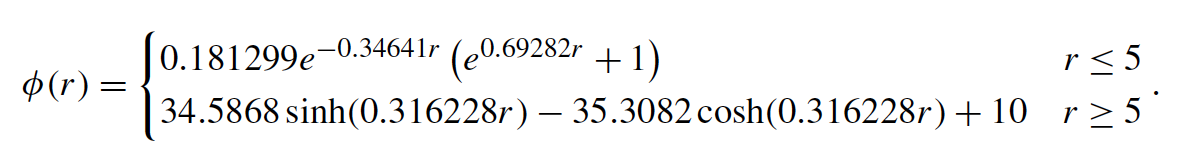

The numerical solutions seem to agree with the exact solutions, and indeed the difference
between the two decreases as $I$ gets larger.

### Reed's Problem

Reed’s problem is a common test problem for numerical methods for solving neutron diffusion
and transport problems. It is a heterogeneous reactor problem that has several regions.
The material properties for our geometry (reflecting at r = 0 and vacuum at r = R) is defined
below.

In [19]:
#in this case all three are constant
def D(r):
    value = (1.0/3.0*(r>5) +
             1.0/3.0/0.001 *((r<=5) * (r>3)) +
             1.0/3.0/5.0 *((r<=3) * (r>2)) +
             1.0/3.0/50.0 * (r<=2))
    return value;
def Sigma_a(r):
    value = 0+(0.1*(r>5) +
               5.0 * ((r<3) * (r>2))+
               50.0 * (r<=2))
    return value;
def nuSigma_f(r):
    return 0*r;
def Q(r):
    value = 0 + 1.0*((r<7) * (r>5)) + 50.0*(r<=2)
    return value;

This problem is set up so that there is a:
* strong absorber with a strong source from r = 0 to 2,
* strong absorber without a source from r = 2 to 3,
* void from r = 3 to 4,
* scatterer with source from r = 5 to 7, and
* scatterer without source from r = 7 to 9.

We approximate the void by having a very large diffusion coefficient and set $\Sigma_a = 0$. The
solution to this problem using our DiffusionSolver function is given below.

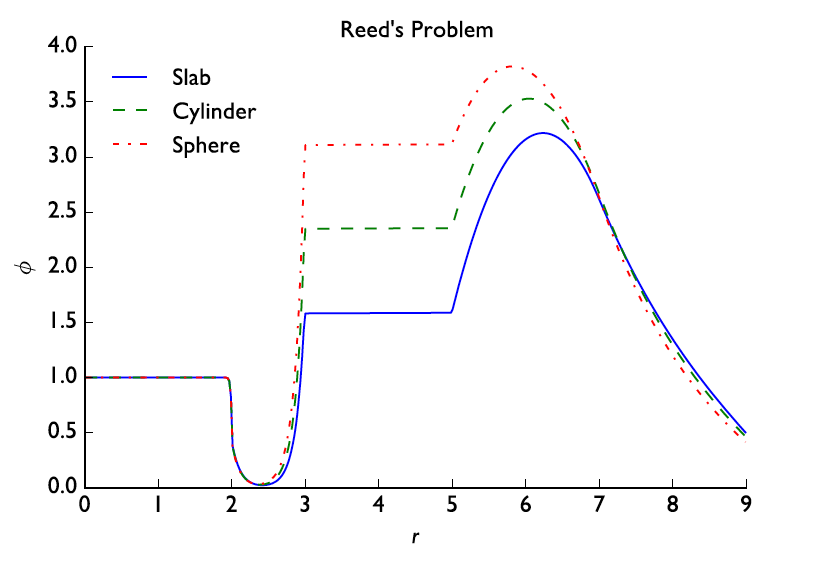

Notice that the scalar flux for the sphere is highest, followed by the cylinder, then the slab.
This is due to the fact that the leakage from the sphere is the smallest because it has the
smallest ratio of surface area to volume. The solutions we obtain are consistent with previous
solutions to Reed’s problem: the solution is flat in the void region, peaks in the scattering
region with source, and goes to a constant in the strong source and absorber region.

We can also solve Reed’s problem in time dependent mode. In this case we will set the
initial condition to have zero scalar flux everywhere, and solve a series of steady-state problems
as we indicated at the beginning of the chapter. In the code below we solve this time
dependent problem in spherical geometry with 
$\Delta t = 0.5$ and $v = 1$. We then plot the solution
at $t = 1, 10, 100$.

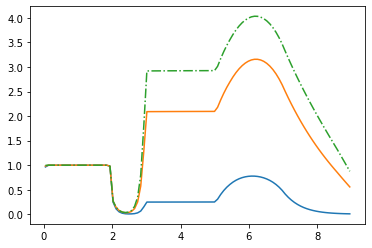

In [24]:
import math
dt = 0.5
tfinal = 100
v = 1
steps = np.linspace(dt,tfinal,int(tfinal/dt))
R = 9
I = 100
dx = R/I
phi_old = np.zeros(I)
#define sigma_a star function
Sigma_a_star = lambda r: Sigma_a(r) + 1/(v*dt)
for step in steps:
    #construct Q star function, needs to convert r to the cell index
    Q_star = lambda r: Q(r) + phi_old[int((r-0.5*dx)/dx-1)]/(v*dt)
    #Solve Diffusion Problem in cylindrical geometry
    rs, phi_sphere = DiffusionSolver(R, I,D, Sigma_a_star,
                                     nuSigma_f, Q_star,
                                     [0.25,0.5*D(R),0],2)
    #update old solution
    phi_old = phi_sphere.copy()
    if (math.fabs(step-1) < dt):
        plt.plot(rs,phi_sphere,label='t = ' + str(step))
    elif (math.fabs(step-10) < dt):
        plt.plot(rs,phi_sphere,'-',label='t = ' + str(step))
    elif (math.fabs(step-100) < dt):
        plt.plot(rs,phi_sphere,'-.',label='t = ' + str(step))

In this problem, steady state is reached relatively quickly near the center of the sphere, but
the scattering region takes on the order of 100 seconds to reach steady state. This problem
uses a coarser spatial mesh because we are solving 1000 steady state problems (instead of just
one) to do the time dependent simulation.